In [64]:
print("Day 12")

Day 12


In [65]:
dataset = '/content/drive/MyDrive/AI_ML/Mall_Customers.csv'

import pandas as pd

df = pd.read_csv(dataset)

In [66]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [71]:
df=df.drop(['CustomerID'] , axis=1)

In [72]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [56]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [57]:
print(df.isna().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


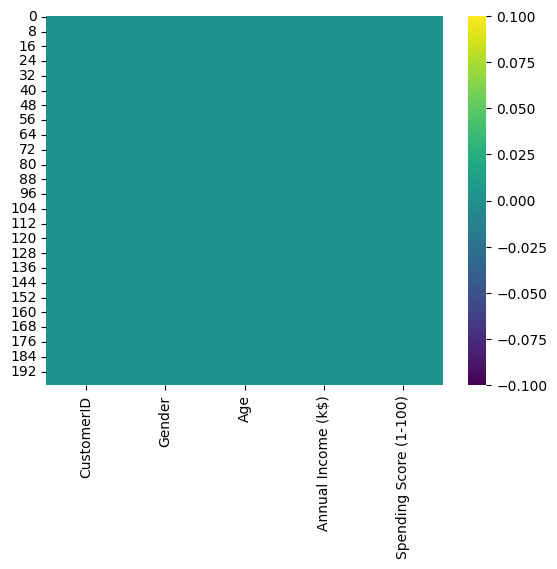

In [12]:
import seaborn as sb
import matplotlib.pyplot as plt

def get_heat_map(df):
  sb.heatmap(df.isnull() , cmap='viridis')
  return plt.show()

get_heat_map(df)

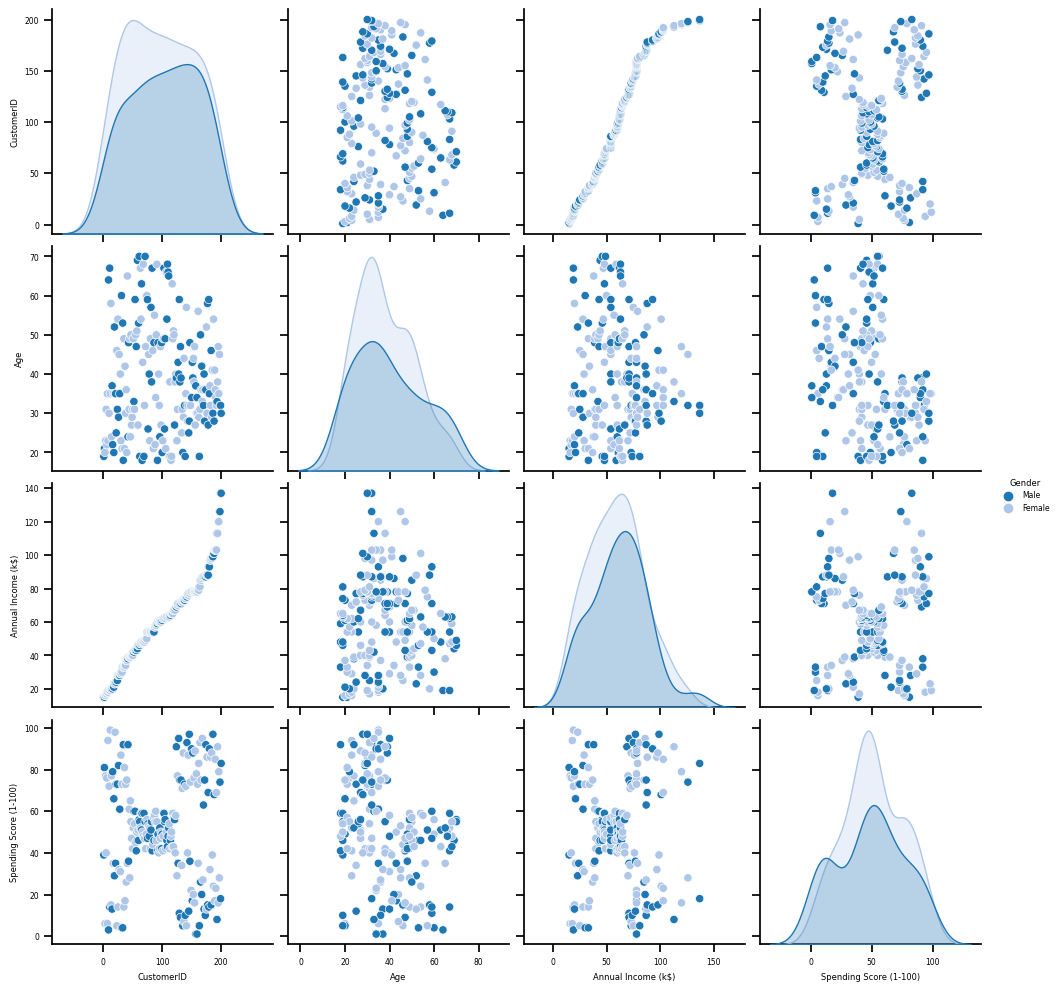

In [13]:
import seaborn as sns
with sns.plotting_context("notebook",font_scale=0.5):
  sns.pairplot(df[['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)']] , hue='Gender' , palette='tab20')

In [73]:
from sklearn.preprocessing import LabelEncoder

gender=df['Gender']

label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(gender)

df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


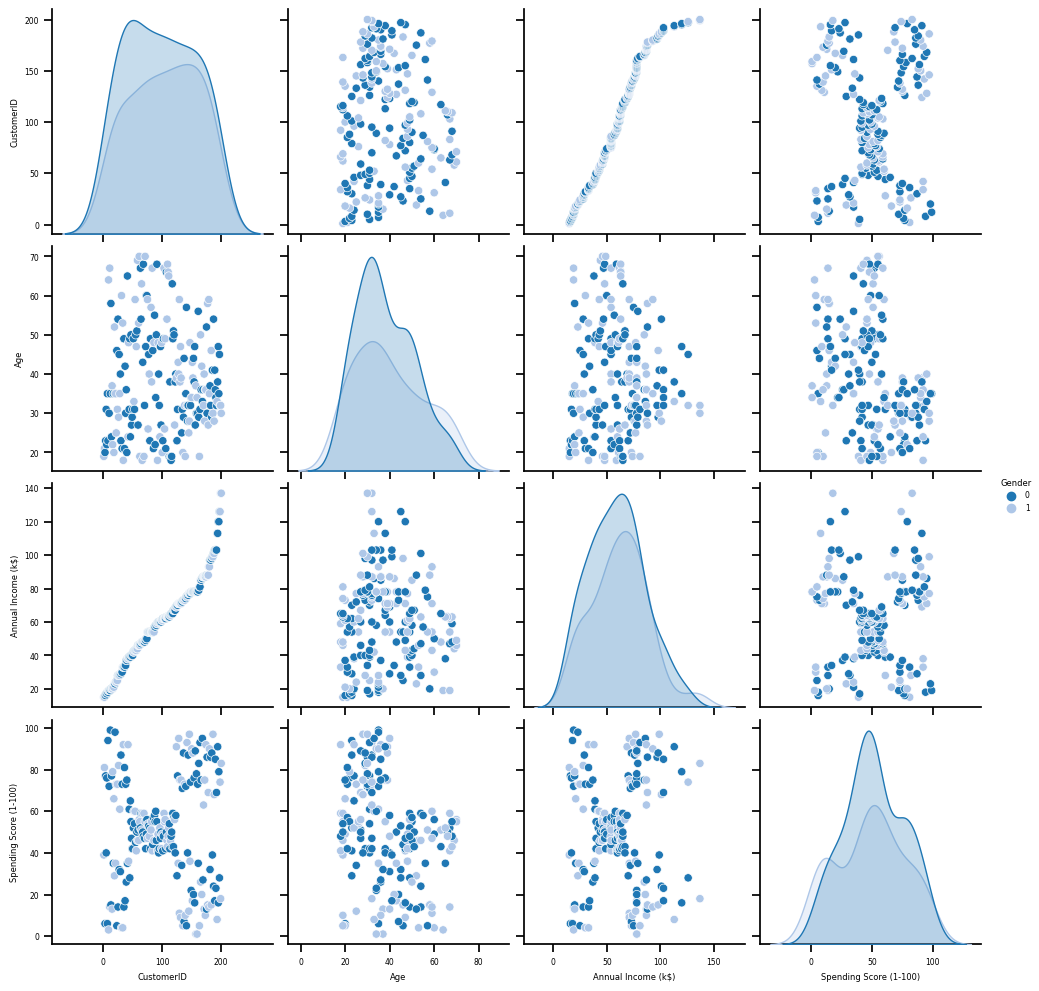

In [15]:
import seaborn as sns
with sns.plotting_context("notebook",font_scale=0.5):
  sns.pairplot(df[['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)']] , hue='Gender' , palette='tab20')

<Axes: >

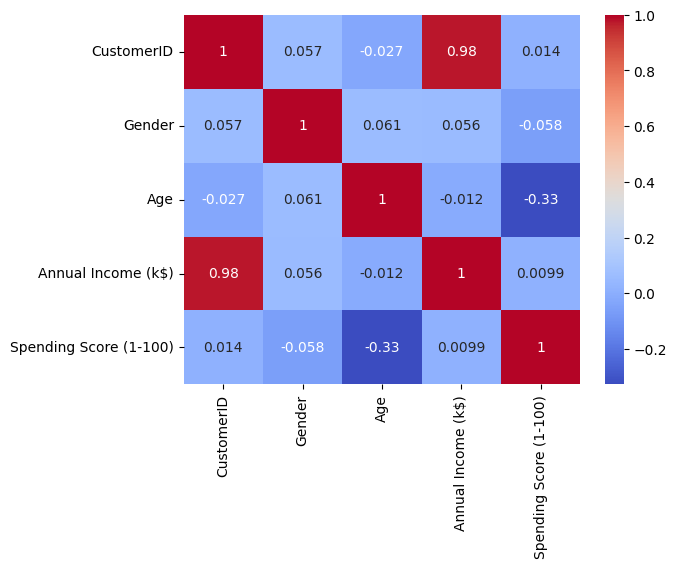

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
columns=['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)']
data=df[columns]
col_mat=data.corr()
sns.heatmap(col_mat,annot=True,cmap='coolwarm')

In [15]:
# x = df.drop(columns='CustomerID')
# x = x.drop(columns='Spending Score (1-100)')
# y = df['Spending Score (1-100)']

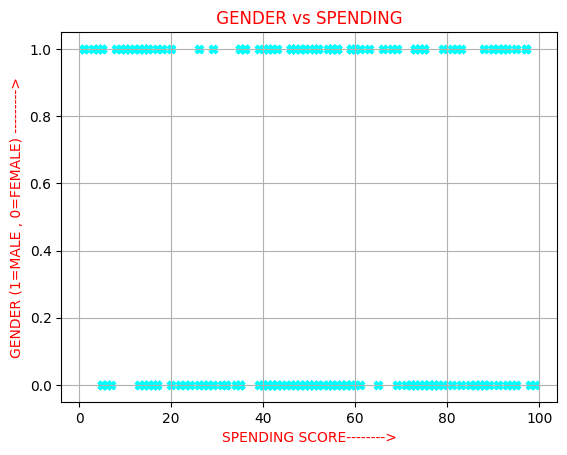

In [18]:
import matplotlib.pyplot as plt

plt.scatter(df['Spending Score (1-100)'], df['Gender'] , marker='X' , color="cyan")
plt.xlabel("SPENDING SCORE-------->" , color='red')
plt.ylabel("GENDER (1=MALE , 0=FEMALE) --------->" , color= 'red')
plt.title(" GENDER vs SPENDING " , color='red')
plt.grid()
plt.show()

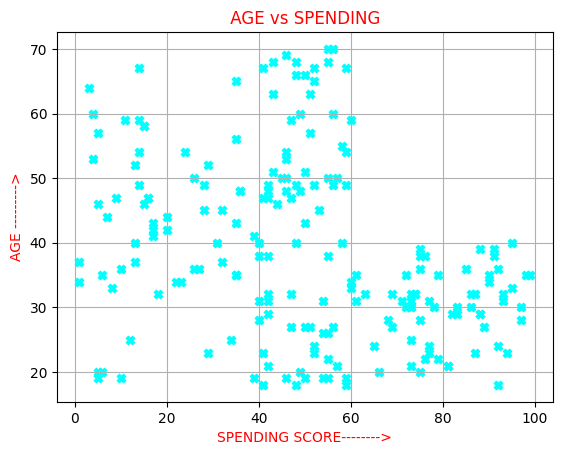

In [19]:
import matplotlib.pyplot as plt

plt.scatter(df['Spending Score (1-100)'], df['Age'] , marker='X' , color="cyan")
plt.xlabel("SPENDING SCORE-------->" , color='red')
plt.ylabel("AGE --------->" , color= 'red')
plt.title(" AGE vs SPENDING " , color='red')
plt.grid()
plt.show()

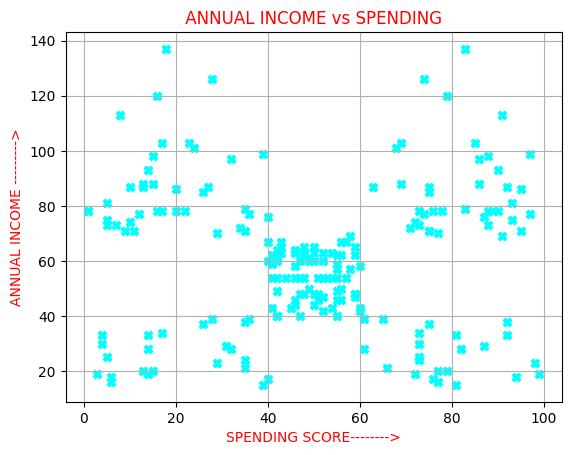

In [20]:
import matplotlib.pyplot as plt

plt.scatter(df['Spending Score (1-100)'], df['Annual Income (k$)'] , marker='X' , color="cyan")
plt.xlabel("SPENDING SCORE-------->" , color='red')
plt.ylabel("ANNUAL INCOME --------->" , color= 'red')
plt.title(" ANNUAL INCOME vs SPENDING " , color='red')
plt.grid()
plt.show()

In [21]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [74]:
from sklearn.cluster import KMeans

km=KMeans(n_clusters=2) # 2 Centroids

clusters=km.fit_predict(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [75]:
clusters

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int32)

In [76]:
df['label']=clusters

In [77]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,19,15,39,0
1,1,21,15,81,1
2,0,20,16,6,0
3,0,23,16,77,1
4,0,31,17,40,0


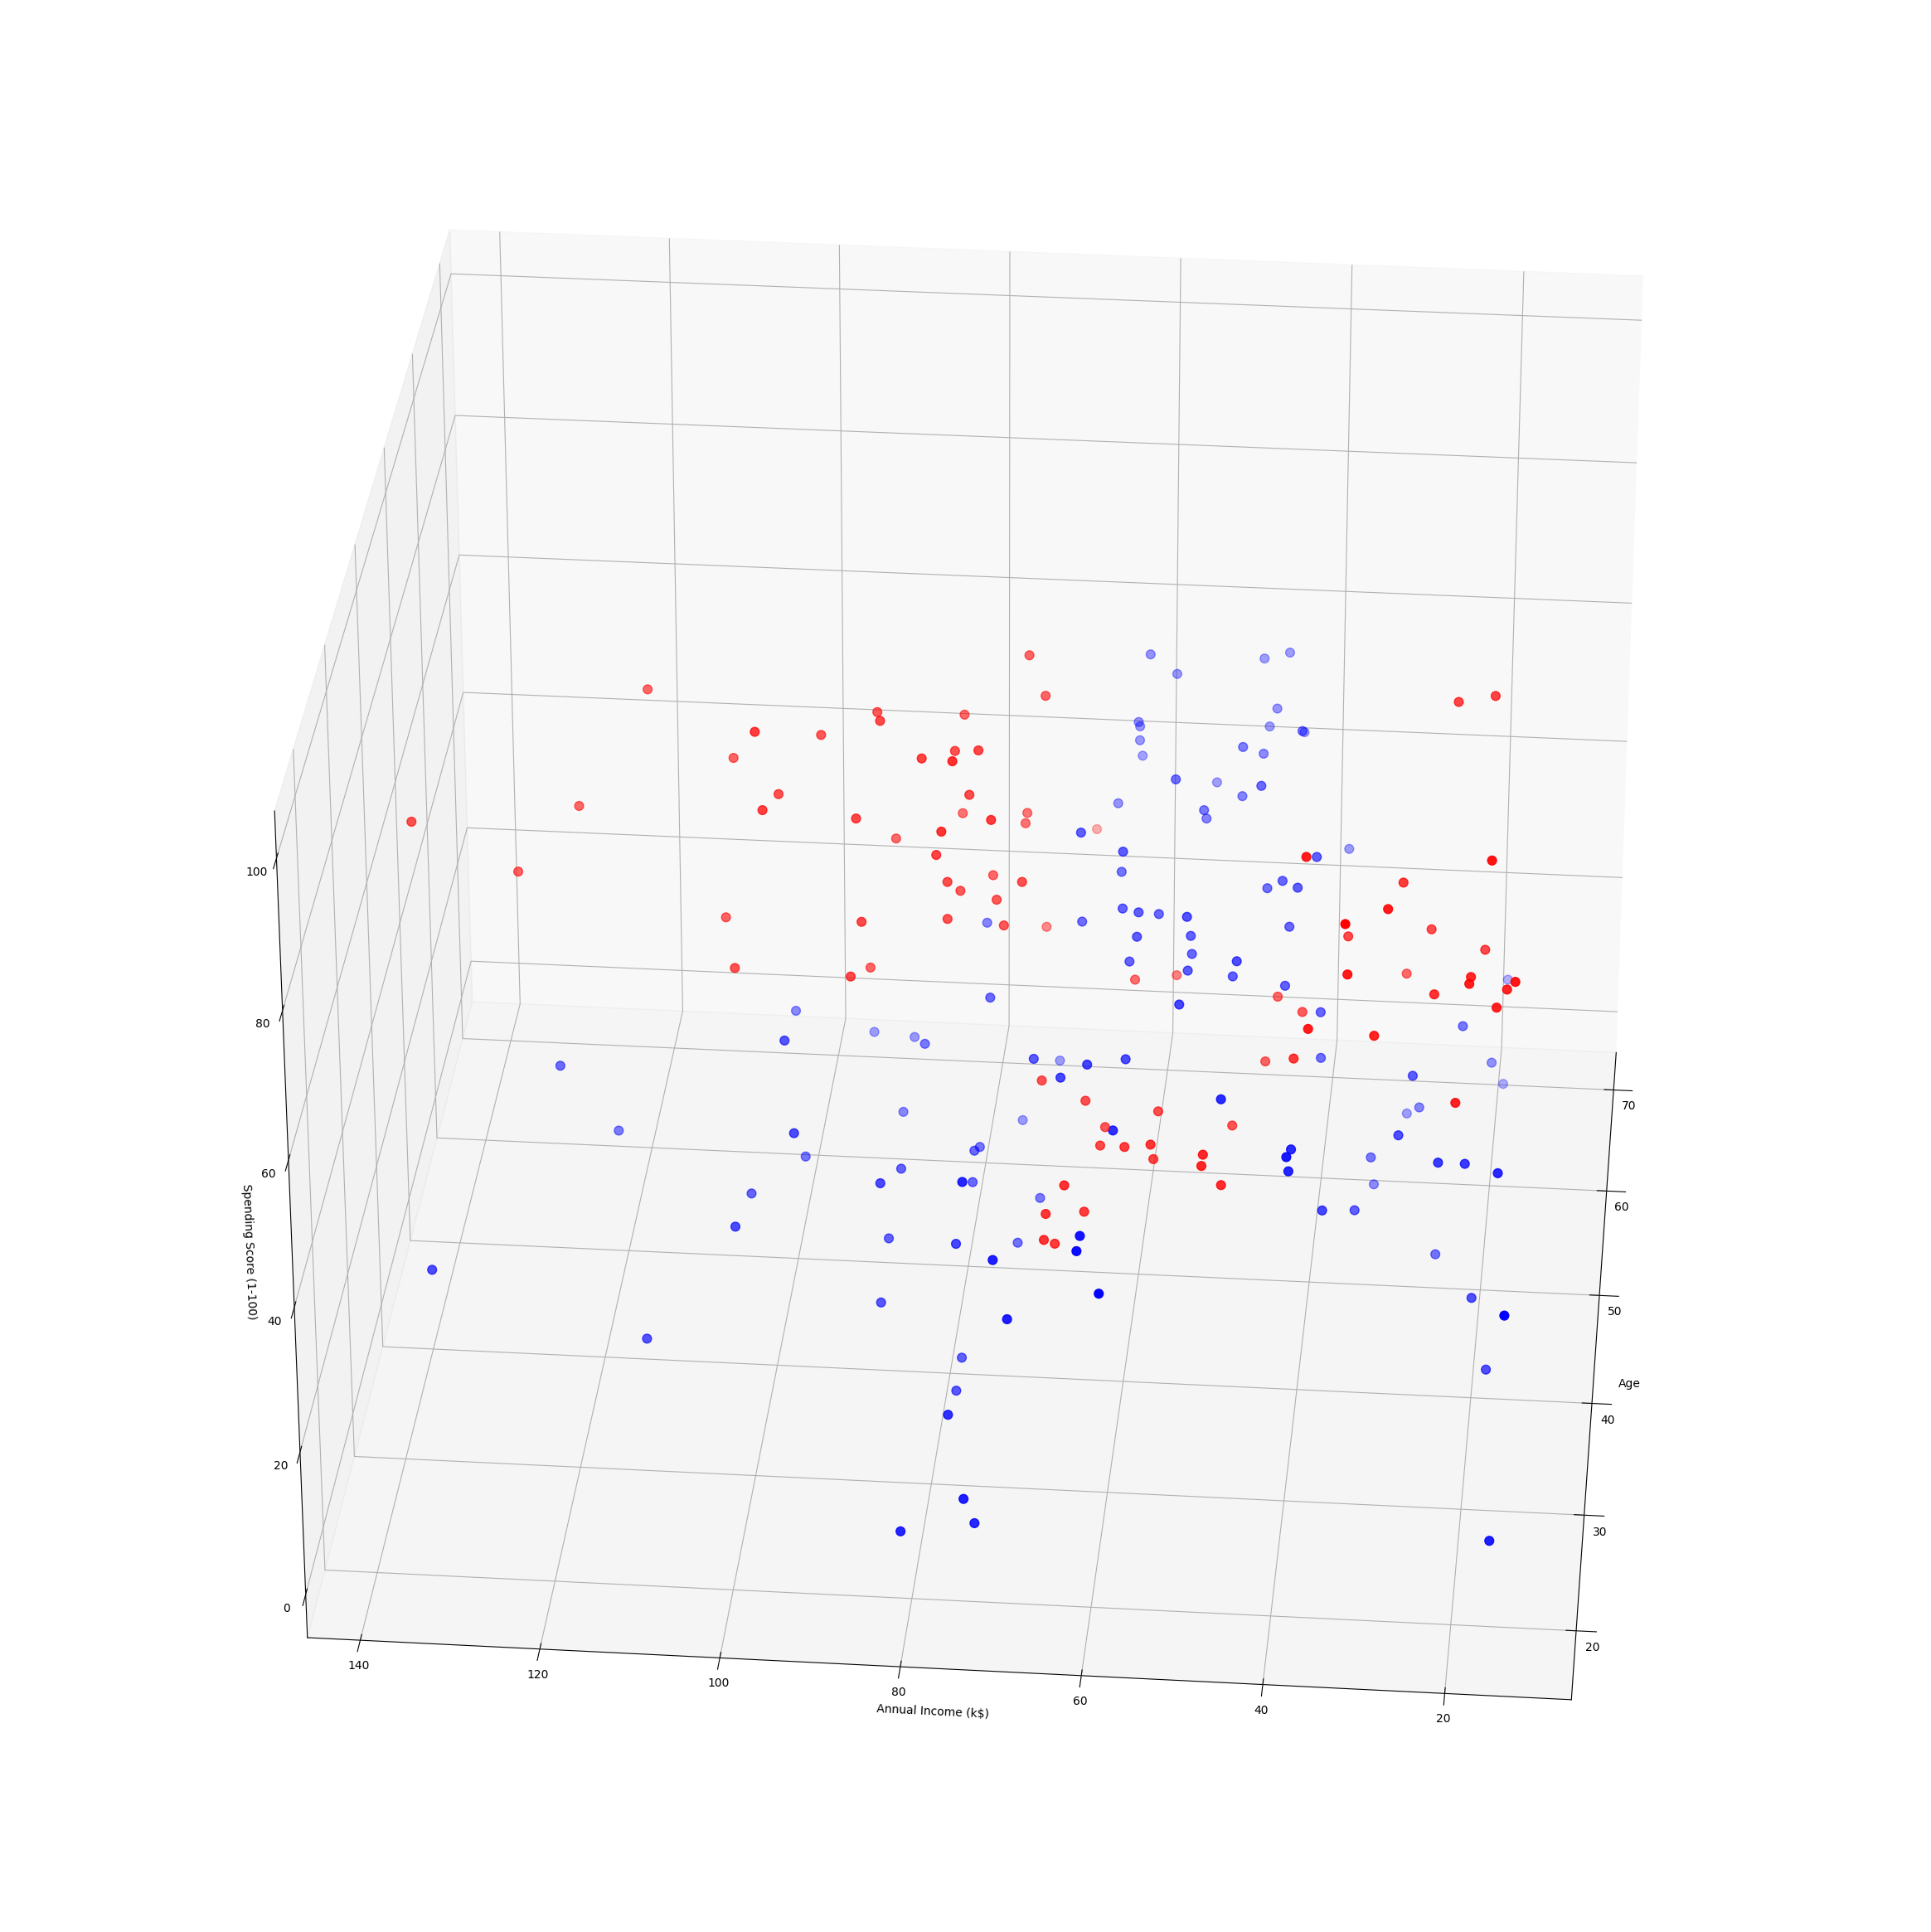

In [78]:
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D




fig = plt.figure(figsize=(40,30))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c='blue', s=60)

ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c='red', s=60)




ax.view_init(30, 185)

plt.xlabel("Age")

plt.ylabel("Annual Income (k$)")

ax.set_zlabel('Spending Score (1-100)')

plt.show()